# Figure 5: connections

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import chant21
from music21 import converter
from scipy.stats import entropy

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import sys
sys.path.append('../')
from src.cantus_filters import *

import matplotlib
from helpers import cm2inch, show_num_contours
matplotlib.style.use('styles.mplstyle')

In [2]:
connections = pd.read_csv('../data/differentiae/connections.csv', index_col=0)

In [3]:
pd.value_counts(connections['mode'])

8    2033
1    1789
7    1195
4     596
2     493
3     478
5     248
6     240
Name: mode, dtype: int64

We show 200 randomly sampled contours per mode, so that we show an equal number of contours per mode.

In [4]:
mode_names = [
    'Dorian authentic', 'Dorian plagal',
    'Phrygian authentic', 'Phrygian plagal',
    'Lydian authentic', 'Lydian plagal',
    'Mixolydian authentic', 'Mixolydian plagal'
]
finals = [62, 62, 64, 64, 65, 65, 67, 67]

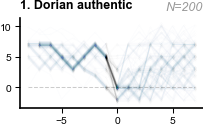

In [5]:
def show_connections(connections, mode, jitter=.2, num_samples=200, 
                    length=4, title=True, show_num_samples=True, **kwargs):
    final = finals[mode - 1]
    subset = connections.query(f'mode=="{mode}"')
    subset = subset.sample(min(num_samples, len(subset)), replace=False)
    jitter = np.random.normal(0, jitter, size=(len(subset), 1))
    pitches = subset.iloc[:, 2:].values - final + jitter

    N = int((connections.shape[1] - 2) / 2)
    differentiae = pitches[:, N-length:N]
    transitions = pitches[:, N-1:N+1]
    openings = pitches[:, N:N+length]
    
    color = kwargs.get('c', 'C0')
    plot_opts = dict(c=color, lw=1, alpha=0.01, linestyle='-', marker='.', ms=.2)
    plot_opts.update(kwargs)
    plt.plot(np.arange(-length, 0), differentiae.T, **plot_opts)
    
    # Connection
    plot_opts['c'] = 'k'
    plt.plot(np.arange(-1, 1), transitions.T, **plot_opts)
    
    # Openings
    plot_opts['c'] = color
    plt.plot(np.arange(0, length), openings.T, **plot_opts)
    
    plt.plot([-length, length-1], [0, 0], 'k--', lw=.5, label='final', alpha=.2)
    if title: plt.title(f'{mode}. {mode_names[mode-1]}', ha='left', x=0)
    if show_num_samples: show_num_contours(len(subset), plt.gca())

    sns.despine()

plt.figure(figsize=cm2inch(4, 2))
show_connections(connections, 1, num_samples=200, length=8, alpha=.01, lw=.5, jitter=.25)

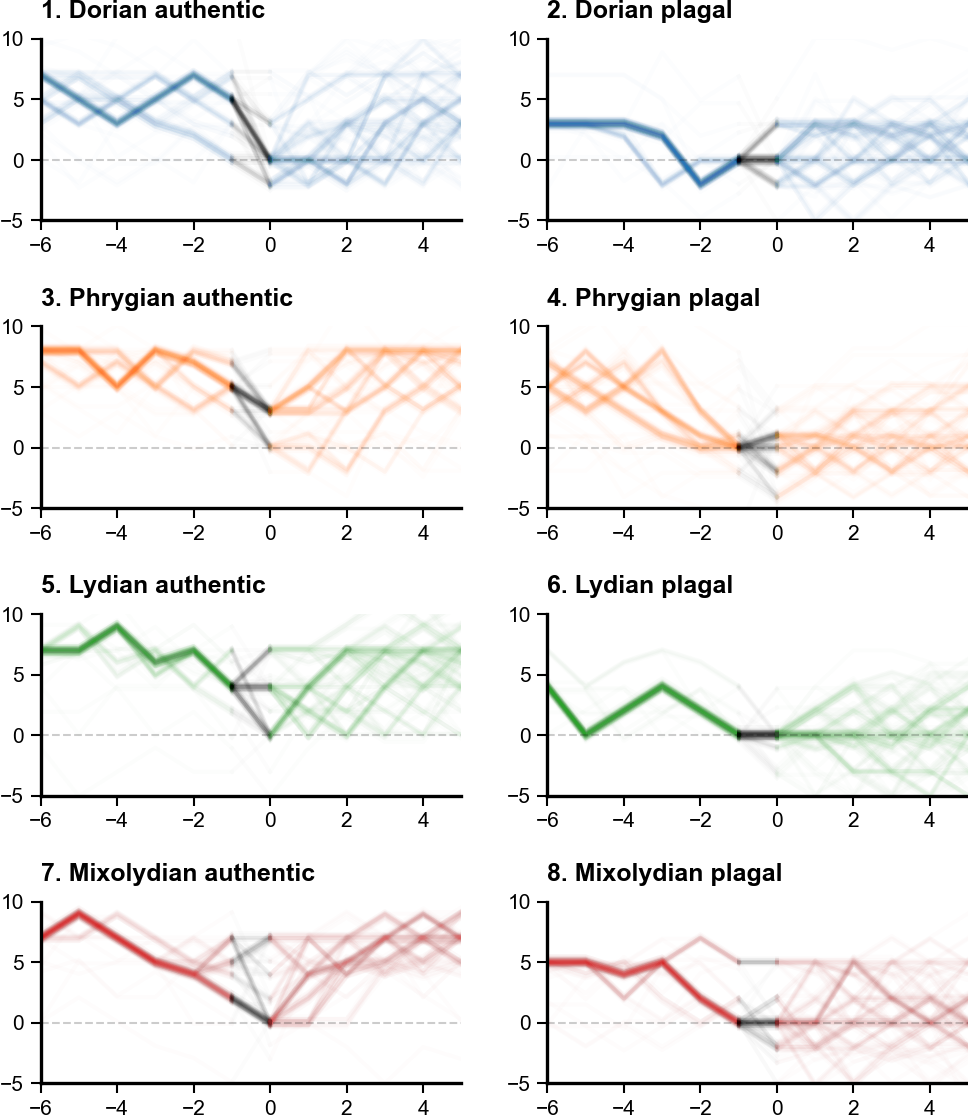

In [6]:
plt.figure(figsize=cm2inch(8.85,10))

length = 6
kwargs = dict(length=length, num_samples=200, 
              show_num_samples=False, marker=None)

ax1 = plt.subplot(421)
show_connections(connections, mode=1, c='C0', **kwargs)
plt.ylim(-5,10)
plt.xlim(-length, length - 1)

plt.subplot(422, sharey=ax1, sharex=ax1)
show_connections(connections, mode=2, c='C0', **kwargs)

plt.subplot(423, sharey=ax1, sharex=ax1)
show_connections(connections, mode=3, c='C1', **kwargs)

plt.subplot(424, sharey=ax1, sharex=ax1)
show_connections(connections, mode=4, c='C1', **kwargs)

plt.subplot(425, sharey=ax1, sharex=ax1)
show_connections(connections, mode=5, c='C2', **kwargs)
# plt.ylabel('Pitch (semitones from final)', ha='left', y=.5)

plt.subplot(426, sharey=ax1, sharex=ax1)
show_connections(connections, mode=6, c='C2', **kwargs)

plt.subplot(427, sharey=ax1, sharex=ax1)
show_connections(connections, mode=7, c='C3', **kwargs)
# plt.xlabel('Position (w.r.t first note of antiphon)', ha='left', x=0.5)

plt.subplot(428, sharey=ax1, sharex=ax1)
show_connections(connections, mode=8, c='C3', **kwargs)

plt.tight_layout()
plt.savefig('../figures/fig05/fig05-connections-raw.pdf', 
            bbox_inches='tight', pad_inches=0, dpi=300)